In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red = pd.read_csv('data/winequality-red1.csv')
white = pd.read_csv('data/winequality-white1.csv')

# 1. Data Exploration

In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


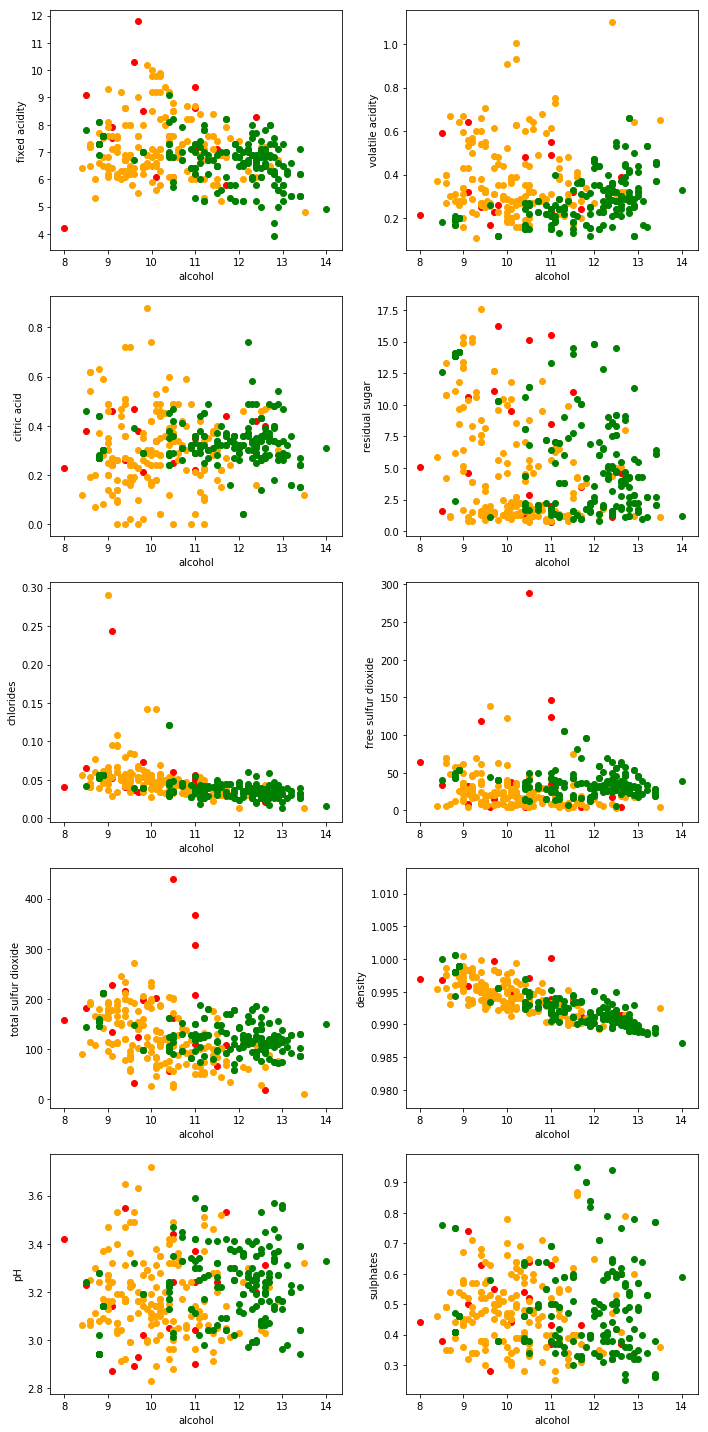

In [4]:
plt.figure(9, (10,20))
i = 1
mainColumn = 'alcohol'
for column in white:
    if (column != 'quality') & (column != 'quality class') & (column != mainColumn):
        plt.subplot(5,2,i)
        i += 1
        plt.tight_layout()
        plt.xlabel(mainColumn)
        plt.ylabel(column)
        for name, group in white.groupby('quality'):
            if name == 3:
                color = 'red'
            elif name == 4:
                color = 'orange'
            elif name == 5:
                color = 'goldenrod'
            elif name == 6:
                color = 'yellow'
            elif name == 7:
                color = 'yellowgreen'
            else:
                color = 'green'
            if (name not in range(5,8)):
                plt.scatter(group[mainColumn], group[column], c=color, label=name)
plt.show()

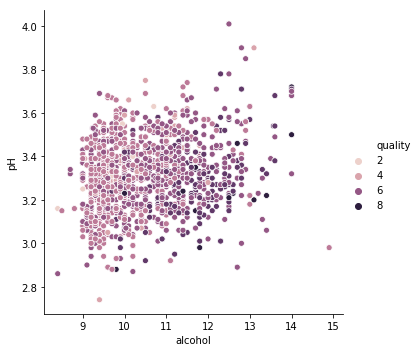

In [5]:
sns.relplot(x="alcohol", y="pH", hue="quality", data=red);

C:\Users\D064232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


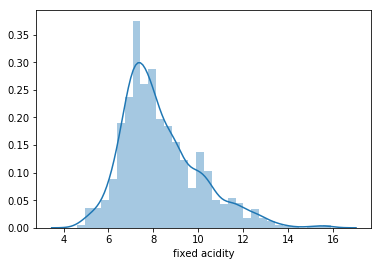

In [6]:
sns.distplot(red['fixed acidity'])

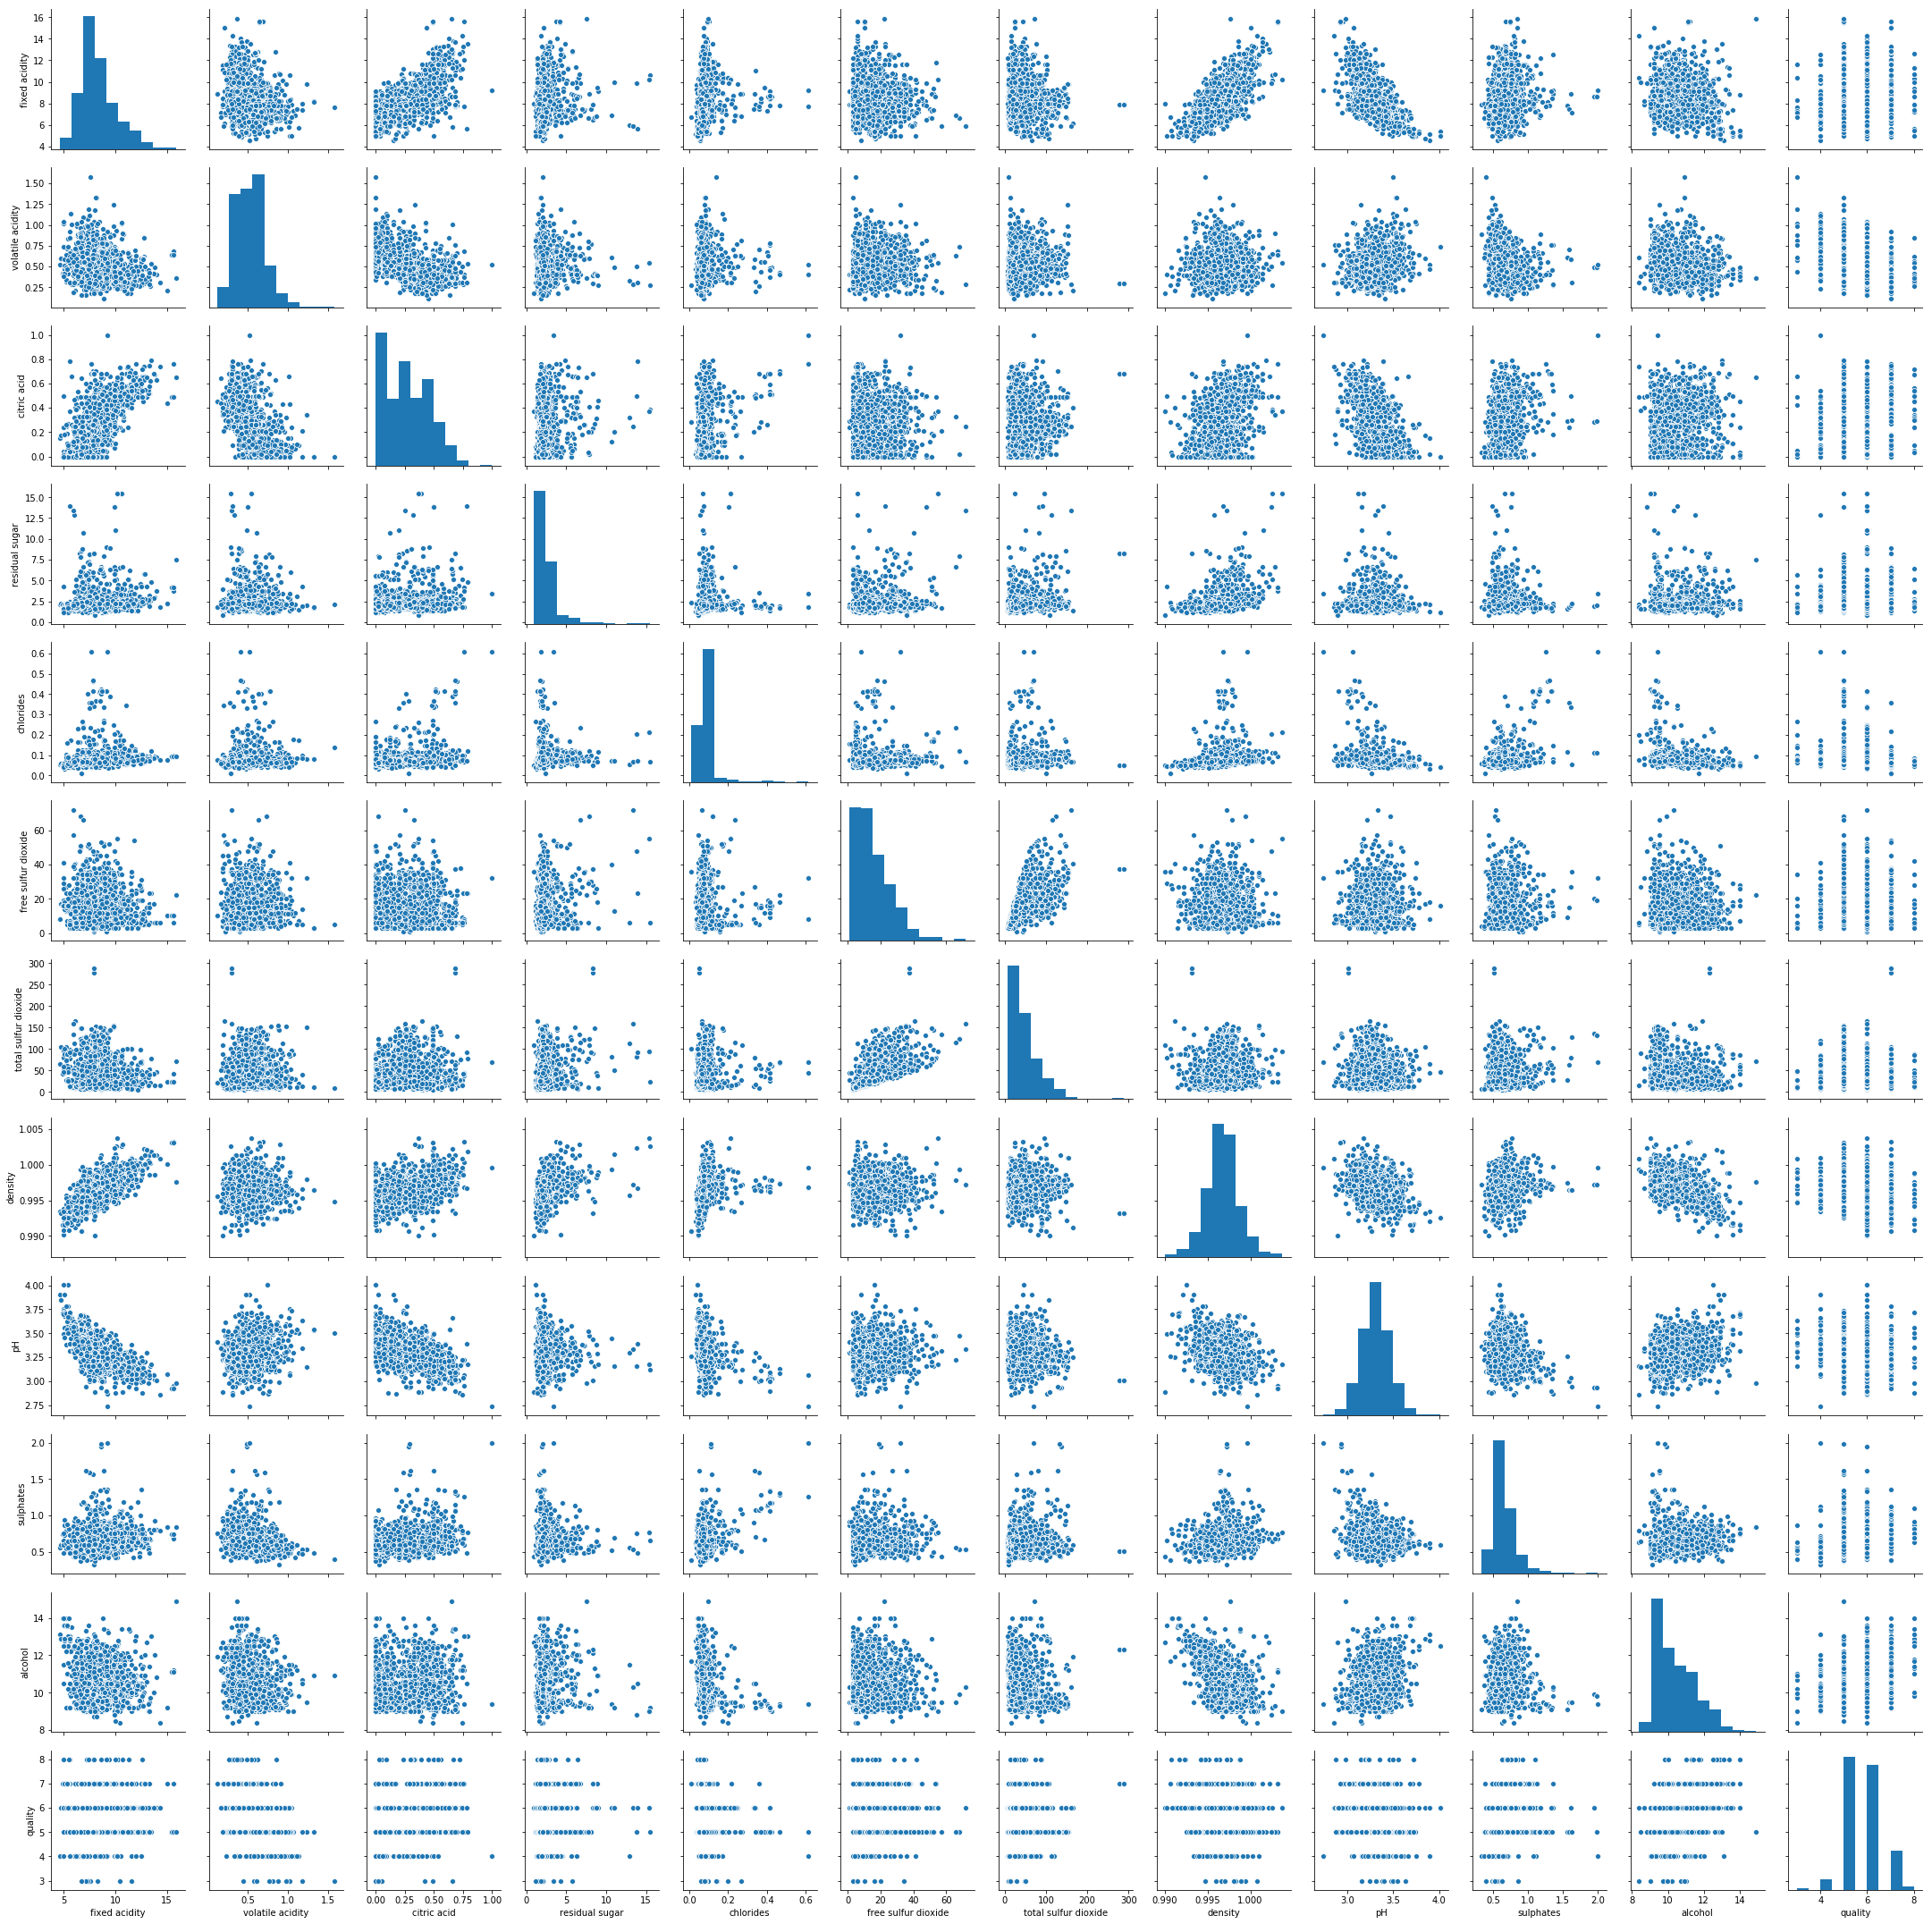

In [7]:
sns.pairplot(red)

C:\Users\D064232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: Illegal argument(s) to subplot: (0, 0)

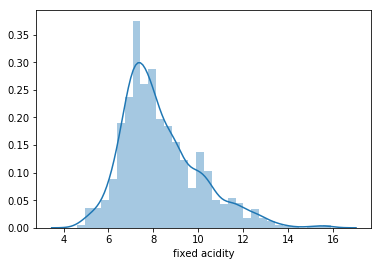

In [17]:
oFig1 = plt.figure(1)
i = 0
j = 0
fig, axes = plt.subplots(nrows=3, ncols=4)
for attribute in red: 
    sns.distplot(red[attribute])
    oFig1.add_subplot(i,j)  
    i +=1
    if(i > 5):
        i = 0
        j = 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A368F7E588>,
      dtype=object)

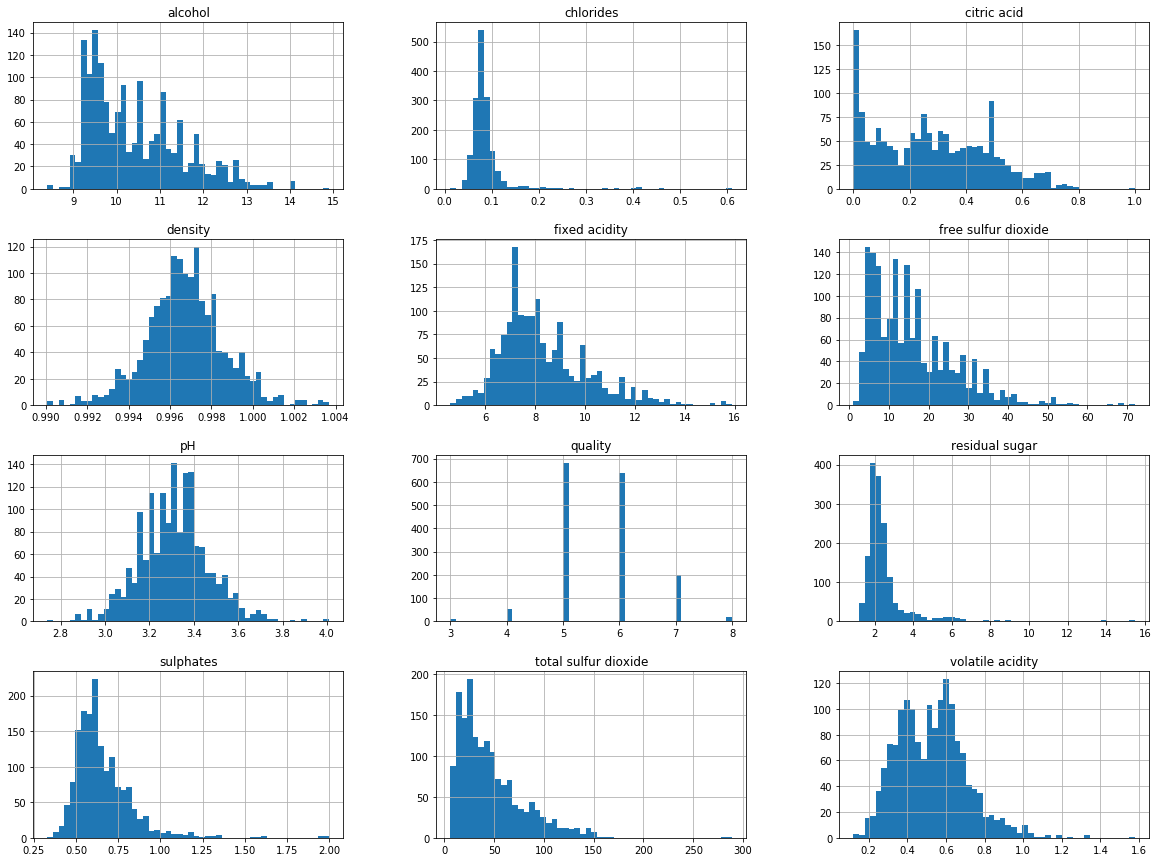

In [10]:
red.hist(bins=50, figsize=(20,15))

In [13]:
corr_matrix = red.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# 2. Data Split

In [15]:
def split_train_test(data, test_ratio):
    sh_is = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_is = sh_is[:test_size]
    train_is = sh_is[test_size:]
    return data.iloc[train_is], data.iloc[test_is]

train_set, test_set = split_train_test(red, 0.2)
print(len(train_set), "train + ", len(test_set), " test")

1280 train +  319  test


In [18]:
from sklearn.model_selection import train_test_split
sk_train, sk_test = train_test_split(red, test_size=0.2, random_state=42)

In [19]:
print(len(sk_train), "+", len(sk_test))

1279 + 320


# 3. Preprocessing

In [1]:
train_set.hist(bins=50, figsize=(20,15))

NameError: name 'train_set' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A36D4D1AC8>,
      dtype=object)

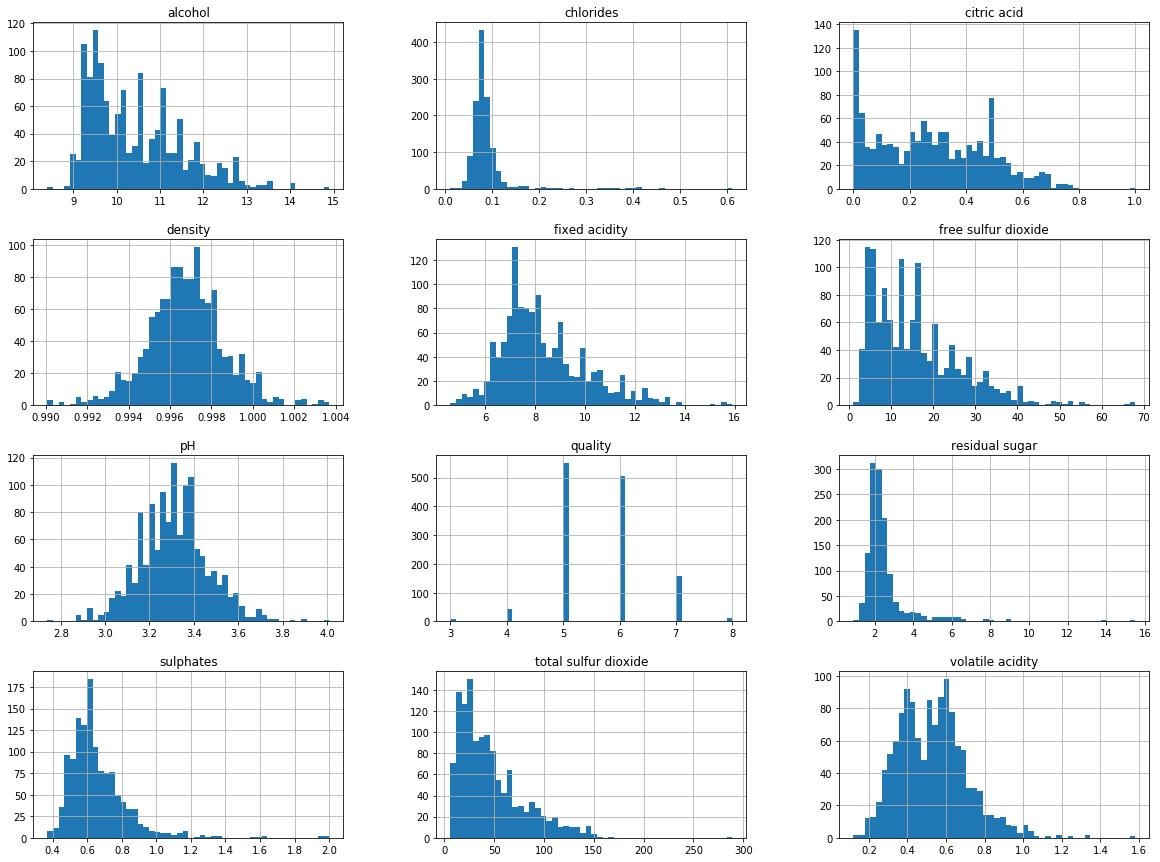

In [22]:
sk_train.hist(bins=50, figsize=(20,15))

In [25]:
from sklearn import preprocessing 
np_sk_train = np.array(sk_train)
sk_train_scaled = preprocessing.scale(np_sk_train)
sk_train_scaled

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  0.45822284,
         1.12317723,  0.46625122],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40119696,
         1.40827174,  0.46625122],
       [ 1.49475291, -0.78434707,  1.01104539, ...,  0.51551749,
        -0.58738978,  0.46625122],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ..., -0.68767023,
        -0.87248428, -0.77353113],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.80199076,
         1.40827174,  1.70603357],
       [-1.46422367, -1.34236676, -0.06383064, ..., -0.68767023,
         2.92877575,  0.46625122]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A36D4D1748>,
      dtype=object)

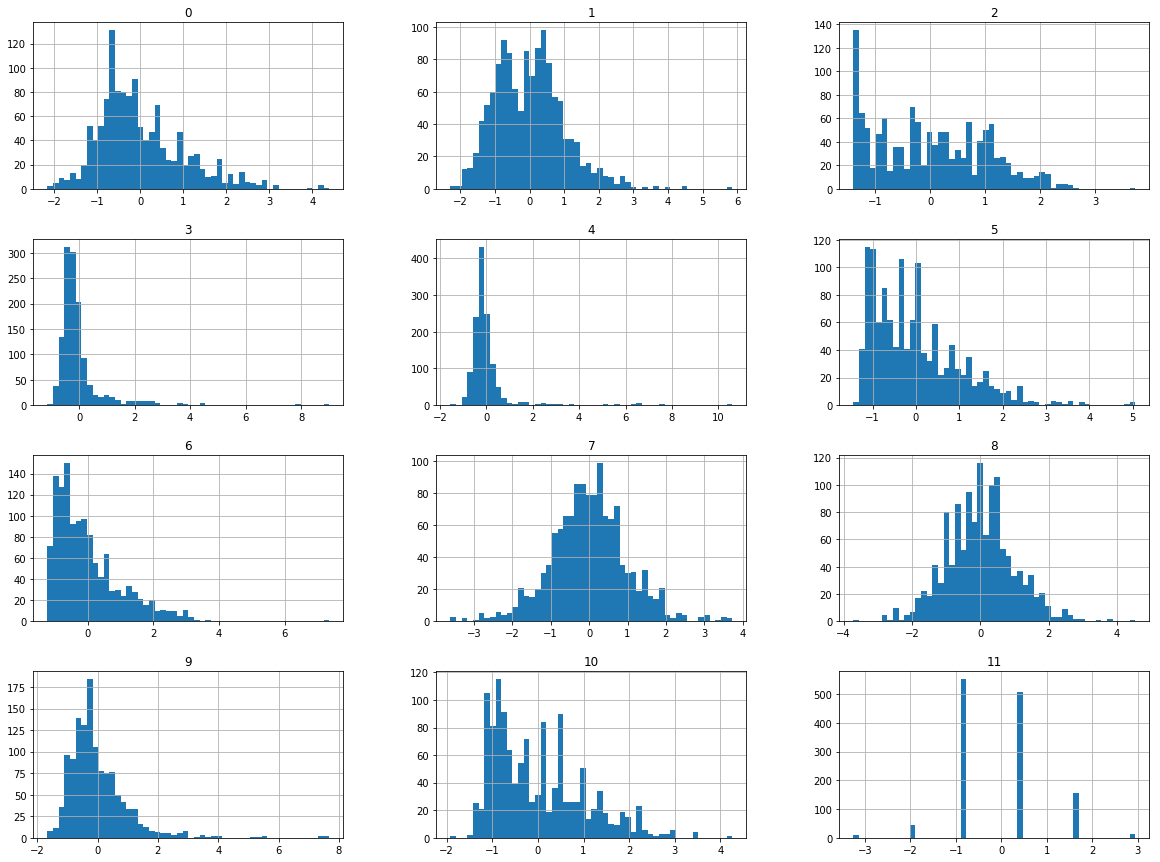

In [27]:
sk_train_scaled_nn = pd.DataFrame(sk_train_scaled)
sk_train_scaled_nn.hist(bins=50, figsize=(20,15))

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
sk_train_minmax = min_max_scaler.fit_transform(np_sk_train)
sk_train_minmax

array([[0.36283186, 0.39041096, 0.31      , ..., 0.22699387, 0.49230769,
        0.6       ],
       [0.13274336, 0.06164384, 0.4       , ..., 0.13496933, 0.53846154,
        0.6       ],
       [0.55752212, 0.18493151, 0.47      , ..., 0.23312883, 0.21538462,
        0.6       ],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.10429448, 0.16923077,
        0.4       ],
       [0.2920354 , 0.05479452, 0.35      , ..., 0.26380368, 0.53846154,
        0.8       ],
       [0.10619469, 0.11643836, 0.26      , ..., 0.10429448, 0.78461538,
        0.6       ]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A36DC55C50>,
      dtype=object)

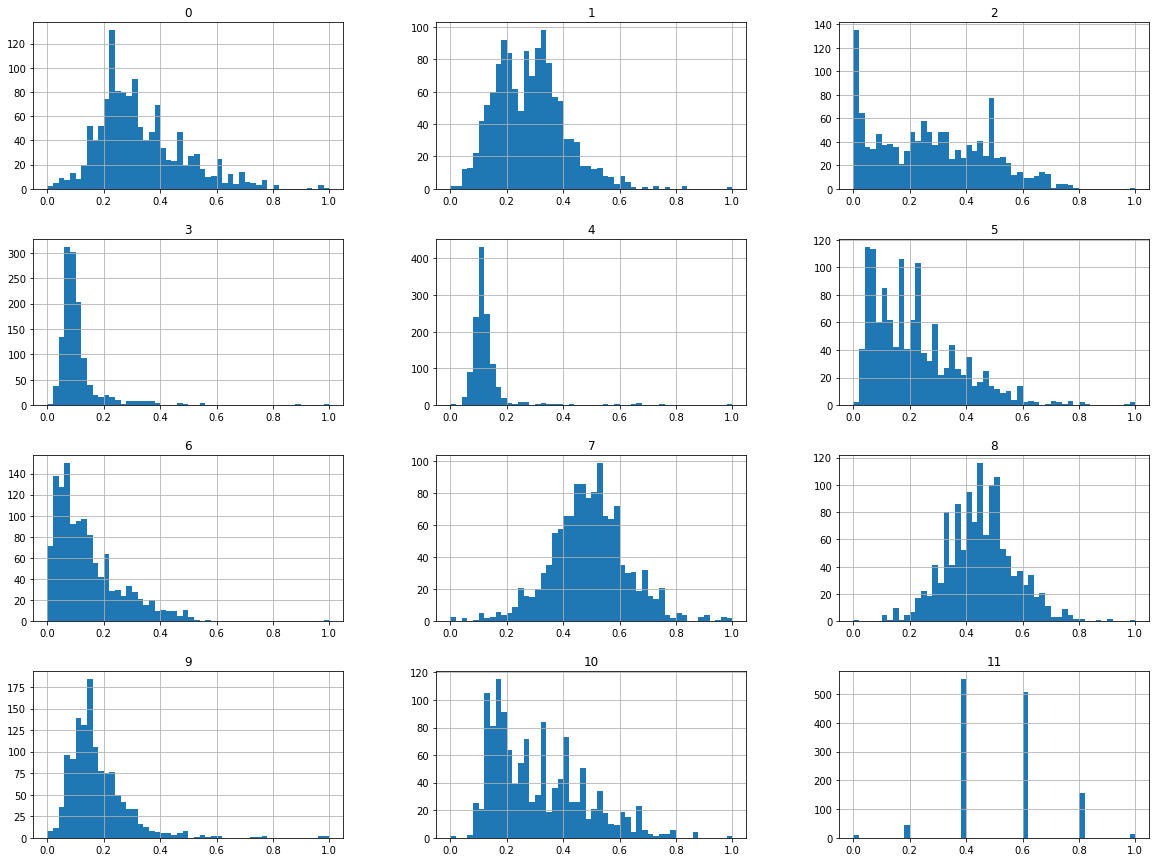

In [31]:
sk_train_minmax_nn = pd.DataFrame(sk_train_minmax)
sk_train_minmax_nn.hist(bins=50, figsize=(20,15))